# **회귀**

-회귀(Regression): 
    -'되돌아온다'; 부모 키 평균과 자녀 키 평균 비교 --> 자녀키는 부모키보다 평균에 가까워지려는(되돌아오려는) 경향 -by Francis Galton
    
    -연속된 실수값(가격, 확률 등)을 정확히 예측하기! 

## **4.1 선형회귀**

-데이터의 경향성을 가장 잘 설명하는 하나의 직선을 예측하는 것. 

-주로 사용되는2차원에서의직선이란, 기울기와 y절편을 가지는 좌표평면 위의 점들의 집합.

-2개의 데이터에 대한 경향성 예측

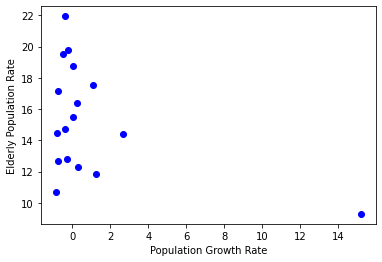

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

#4.1 지역별 인구증가율과 고령인구비율 시각화하기
population_inc = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
population_old = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

plt.plot(population_inc, population_old, 'bo')
plt.xlabel('Population Growth Rate')
plt.ylabel('Elderly Population Rate')
plt.show()

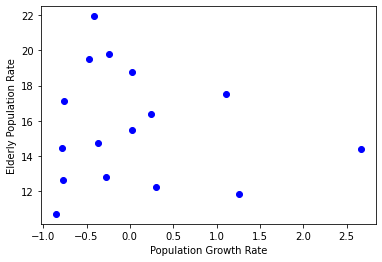

In [2]:
#그래프 분석
#오른쪽 아래에 치우친 점 발견!  --> "극단치(outlier)"
#데이터의 일반적인 경향을 파악하려면 극단치를 제거해야 함. 

#4.2 지역별 인구증가율과 고령인구비율 시각화하기 2 -극단치 제거하기
population_inc = population_inc[:5] + population_inc[6:]
population_old = population_old[:5] + population_old[6:]

plt.plot(population_inc, population_old, 'bo')
plt.xlabel("Population Growth Rate")
plt.ylabel("Elderly Population Rate")
plt.show()

기울기 a: -0.355834147915461 y절편 b: 15.669317743971302


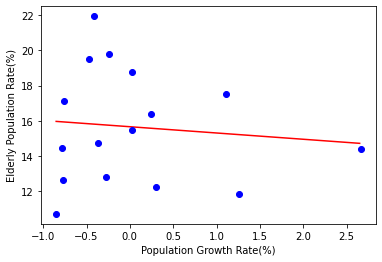

In [3]:
#잔차(residual): 데이터의 경향성을 가장 잘 설명하는 하나의 직선과 각 데이터의 차이
#최소제곱법(Least Square Method): 잔차의 제곱을 최소화하는 알고리즘 
#  --y=ax+b의 기울기(a)와 절편(b)를 구할 수 있다. (cf. 네이버 지식백과 - 최소제곱법)

#4.3 최소제곱법으로 회귀선 구하기
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

#X와 Y의 평균 구하기:
x_bar = sum(X) / len(X)
y_bar = sum(Y) / len(Y)

#최소제곱법으로 기울기와 절편 구하기:
a = sum([(y - y_bar) * (x - x_bar) for y, x in list(zip(Y, X))])
#두 개 이상의 리스트를 하나로 묶기: list(zip(list_1, list_2)) 
#--각 리스트 요소의 수 같아야 함. 같은 인덱스끼리 하나의 튜플로 묶어서 리스트로 반환
a /= sum([(x - x_bar) ** 2 for x in X])
b = y_bar - a * x_bar
print("기울기 a:", a, "y절편 b:", b)

#그래프를 그리기 위해 회귀선의 x, y 데이터 구하기
#X변화량에 따른 Y예측값!
line_x = np.arange(min(X), max(X), 0.01)
#파이썬range: 정수로만 구성
#넘파이arange: numpy.arange(start, stop, step, dtype=None)
#반열린구간 [start, stop)에서 step의 크기만큼 일정하게 떨어져 있는 숫자들을 array형태로 반환
#cf. 구간기호: [] - 포함, () - 미포함
#매개변수: stop -반드시 필요 / start, step -전달되지 않았다면 기본값으로 설정(start: 0, step: 1)
#매개변수로 사용되는 값 ≠ 인덱스번호 --> 실제값을 의미한다! 
line_y = a * line_x + b

#회귀선 그리기
plt.plot(line_x, line_y, 'r-')

plt.plot(X, Y, 'bo')
plt.xlabel('Population Growth Rate(%)')
plt.ylabel('Elderly Population Rate(%)')
plt.show()

In [4]:
#그래프분석: x값이 증가할수록 y값 감소 --"음의 상관관계"
'''
<SUMMARY>

x_bar = sum(X) / len(X)
y_bar = sum(Y) / len(Y)

a = sum([(y - y_bar) * (x - x_bar) for y, x in list(zip(Y, X))])
a /= sum([(x - x_bar) ** 2 for x in X])
b = y_bar - a * x_bar

line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b

plt.plot(line_x, line_y, 'r-')

plt.plot(X, Y, 'bo')
plt.xlabel('Population Growth Rate(%)')
plt.ylabel('Elderly Population Rate(%)')

plt.show()
'''

"\n<SUMMARY>\n\nx_bar = sum(X) / len(X)\ny_bar = sum(Y) / len(Y)\n\na = sum([(y - y_bar) * (x - x_bar) for y, x in list(zip(Y, X))])\na /= sum([(x - x_bar) ** 2 for x in X])\nb = y_bar - a * x_bar\n\nline_x = np.arange(min(X), max(X), 0.01)\nline_y = a * line_x + b\n\nplt.plot(line_x, line_y, 'r-')\n\nplt.plot(X, Y, 'bo')\nplt.xlabel('Population Growth Rate(%)')\nplt.ylabel('Elderly Population Rate(%)')\n\nplt.show()\n"

In [5]:
#4.4 텐서플로를 이용해 회귀선 구하기
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42] #라벨

#기울기와 절편을 랜덤값으로 초기화하기
a = tf.Variable(random.random())
b = tf.Variable(random.random())

#잔차의 제곱의 평균을 반환하는 함수 만들기
def compute_loss():
    y_pred = a * X + b
    loss = tf.reduce_mean((Y - y_pred) ** 2)   # <---최소화하는 것이 목표! 
    '''
    <reduce_mean()>
    
    -텐서플로우 차원을 줄이면서 연산하는 함수. (cf. reduce_sum도 있다.)
    -2차원 이상의 행렬로 된 데이터의 전체 원소평균 구할 때 사용.
    -특정 차원을 제거한 뒤 평균 반환. 남겨두고자 하는 차원이 아닌 "제거할 차원" 입력!! (배열형식으로 입력 가능)
    -cf. Zero-based indexes 사용, 0은 1차원, 1은 2차원을 의미.
    
    '''
    return loss 

optimizer = tf.optimizers.Adam(lr = 0.07)
    '''
    <optimizers>
    
    -손실을 최소화하는 계산(미분 및 가중치 업데이트)을 자동으로 진행해주는 도구.
    -tf.optimiizers = tf.keras.optimizers
    
    <Adam optimizer>
    SGD와 더불어 많이 쓰이는 최적화함수. 
    lr: learning rate. 학습률. 보통 0.01~0.0001
    
    cf.SGD(경사하강법, Stochastic Gradient Descent) 
        -- 가중치(w)에 (입력 * 학습률 * 에러)를 더해주는 것 
        --손실곡선의 기울기. 손실곡선을 미분한 다음 그 값을 이용해서 가중치가 손실이 가장 낮아지는 지점에 도달하도록 반복 계산
        --가중치를 업데이트할 때 미분을 통해 기울기를 구한 다음 기울기가 낮은 쪽으로 업데이트하겠다! 
        --'stochastic': 전체를 한번에 계산하지 않고 확률적으로 일부 샘플을 구해서 조금씩 나눠 계산하겠다!
    '''
for i in range(1000):                                  #1000번동안 학습하면서
    optimizer.minimize(compute_loss, var_list=[a, b])  #잔차제곱의 평균 최소화하기!
    #optimizer.minimize(최소화할 손실, var_list=[학습시킬 변수])
    
    if i % 100 == 99:
        print(i, '기울기 a:', a.numpy(), 'y절편 b:', b.numpy(), '손실 loss:', compute_loss().numpy())
        #텐서플로 연산은 자동으로 넘파이 배열을 텐서로 변환, 넘파이 연산은 자동으로 텐서를 넘파이 배열로 변환.
        #.numpy():텐서를 넘파이 배열로 변환. 
        #tf.Tensor와 배열은 메모리 표현을 공유 --> 일반적으로는 간단(저렴). 
        #but, tf.Tensor: GPU 메모리에 저장될 수 있고, 넘파이 배열: 항상 호스트 메모리에 저장 --> 변환이 불가능한 경우가 있다.
        #==> GPU에서 호스트 메모리로 복사 후 변환 (cf. tensorflow API - numpy호환성 )
        
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b

plt.plot(line_x, line_y, 'r-')
plt.plot(X, Y, 'bo')
plt.xlabel("Population Growth Rate(%)")
plt.ylabel("Elderly Growth Rate(%)")
plt.show()

#이렇게 얻은 회귀선이 과연 데이터를 잘 반영하고 있는 것일까? 

IndentationError: unexpected indent (<ipython-input-5-012e008186bb>, line 25)

## **4.2 비선형회귀: 다항회귀**

-비선형회귀(Nonlinear Regression): 선형회귀로는 표현할 수 없는 데이터의 경향성 설명 

    -다항회귀(Polynomial Regression): 2차 이상의 회귀식 사용. --> 직선이 아닌 곡선으로 그래프가 그려진다! 
    

In [ ]:
#4.5 텐서플로를 이용해 2차함수 회귀선 구하기 
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

#a, b, c를 랜덤값으로 초기화하기 
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())

#잔차제곱의 평균을 반환하는 함수 만들기
def compute_loss():
    y_pred = a * X*X + b * X + c
    loss = tf.reduce_mean((Y - y_pred) ** 2)
    return loss 

#최적화하기
optimizer = tf.optimizers.Adam(lr = 0.07)

for i in range (1000): 
    optimizer.minimize(compute_loss, var_list=[a, b, c])
    
    if i % 100 == 99:
        print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'c:', c.numpy, 'loss:', compute_loss().numpy())

#회귀선의 x, y구하기
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x*line_x + b * line_x + c

#그래프 그리기
plt.plot(line_x, line_y, 'r-')
plt.plot(X, Y, 'bo')
plt.xlabel("Population Growth Rate(%)")
plt.ylabel("Elderly Growth Rate(%)")
plt.show()

In [ ]:
#4.6 텐서플로를 이용해 3차함수 회귀선 구하기
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

#a, b, c, d를 랜덤값으로 초기화하기
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())
d = tf.Variable(random.random())

#잔차제곱의 평균을 반환하는 함수 만들기
def compute_loss():
    y_pred = a * X*X*X + b * X*X + c * X + d
    loss = tf.reduce_mean((Y - y_pred) ** 2)
    return loss

#최적화하기
optimizer = tf.optimizers.Adam(lr = 0.07)

for i in range(1000):
    optimizer.minimize(compute_loss, var_list = [a, b, c, d])
    
    if i % 100 == 99:
        print(i,
             'a:', a.numpy(),
             'b:', b.numpy(),
              'c:', c.numpy(),
              'd:', d.numpy(),
              'loss:', compute_loss().numpy()
             )
        
#회귀선의 x, y 구하기
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x*line_x*line_x + b * line_x*line_x + c * line_x + d

#그래프 그리기
plt.plot(line_x, line_y, 'r-')
plt.plot(X, Y, 'bo')
plt.xlabel("Population Growth Rate(%)")
plt.ylabel("Elderly Growth Rate(%)")
plt.show()

In [ ]:
#그래프분석: 
#3차함수가 그려졌지만 데이터의 경향을 잘 표현하고 있지는 않다. 
#--> 계속 식을 바꿔보며 최적의 회귀식을 찾도록 해야 함: 텐서플로! 

## **4.3 딥러닝 네트워크를 이용한 회귀**

In [ ]:
#4.7 딥러닝 네트워크를 이용한 회귀
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

model = tf.keras.Sequential([
        tf.keras.layers.Dense(units=6, activation='tanh', input_shape=(1,)),  
        tf.keras.layers.Dense(units=1)  # ∵ X입력값에 대한 하나의 Y값만 출력
])
#활성화함수 tanh: 
#-하이퍼볼릭 탄젠트함수. 실수를 입력받아 -1과 1사이의 출력 반환.
#-cf. sigmoid: 0과 1사이의 출력 반환. 
#-하이퍼볼릭함수의 코사인과 사인을 각각 제곱한 후 서로 빼면 1  <-- 단위쌍곡선
#-cf. 코사인과 사인을 각각 제곱한 후 서로 더하면 1  <-- 단위원
#(cf. 영문위키 - 하이퍼볼릭함수)

model.compile(optimizer = tf.optimizers.SGD(lr = 0.1,), loss='mse')   
#mse: 평균제곱오차(Mean Squared Error)

model.summary()

In [ ]:
#4.8 딥러닝 네트워크 학습시키기
model.fit(X, Y, epochs=10)
#X를 입력하면 Y가 정답이 되도록 10회 학습 
#손실에 거의 변화가 없으면 학습완료 -충분히 학습했다고 판단되면 학습 종료하도록! 
# --∵학습데이터 과적합. 
#[!]학습데이터 중 일부를 떼어내어 검증데이터로 설정하기: 학습멈춤 시점 결정에 좋은 기준(4.4 참고)

In [ ]:
#4.9 딥러닝 네트워크 Y값 예측하기
model.predict(X)
#학습이 끝나면 딥러닝 네트워크가 어떤 값을 예측하는지 확인하도록!
#학습이 잘 된것인지 확인하려면 그래프 그려보기

In [ ]:
#4.10 딥러닝 넽크워크의 회귀선 확인
line_x = np.arange(min(X), max(X), 0.01)
line_y = model.predict(line_x)

plt.plot(line_x, line_y, 'r-')
plt.plot(X, Y, 'bo')
plt.xlabel("Population Growth Rate(%)")
plt.ylabel("Elderly Growth Rate(%)")
plt.show()

In [ ]:
#그래프분석: 
#4.5예제에서 그렸던 2차함수와 비슷하지만 조금 더 직선에 가까움.
#==> 2차함수와 비슷한 성능으로 X데이터에 대해 Y예측

'''
<SUMMARY> 딥러닝을 통한 네트워크 회귀 
-회귀식을 가정하고 변수를 직접 추정하지 않아도 회귀선 예측 가능

X = [ ]
Y = [ ]

1. 딥러닝 네트워크 만들기
model = tf.keras.Sequential([
        tf.keras.layers.Dense(units=(뉴런 수), 
                              activation='(사용할 활성화함수)', 
                              input_shape( ,)),
        tf.keras.layers.Dense(units=(뉴런 수 = 출력해야 할 Y값의 수))
])

model.compile(optimizer = tf.optimizers.(사용할 최적화함수)(lr = (학습률), 
              loss='(사용할 loss 종류)'))
              
#model.summary()


2. 딥러닝 네트워크 학습시키기
model.fit(X, Y , epochs=(학습 횟수))


3. 딥러닝 네트워크 Y값 예측하기
model.predict(X)


4. 회귀선 만들기
line_x = np.arange(min(X), max(X), 0.01)
line_y = model.predict(line_x)


5. 시각화하기
plt.plot(line_x, line_y, 'r-')
plt.plot(X, Y, 'bo')
plt.xlabel("(x축 이름)")
plt.ylabel("(y축 이름)")
plt.show()
'''

## **4.4 보스턴 주택 가격 데이터셋**

-Boston Housing Dataset을 이용한 주택가격 예측 네트워크 만들기

-1978년 美 보스턴주 506개 타운의 주택 가격 중앙값을 $1,000 단위로 나타내는 데이터셋

-범죄율, 주택당 방 개수, 고속도로까지의 거리 등 13가지 데이터를 이용해 주택 가격 예측

In [6]:
#4.11 보스턴 주택 가격 데이터 불러오기
from tensorflow.keras.datasets import boston_housing

(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()
#훈련데이터: 학습에 사용.
#검증데이터: 학습시 검증에 사용.
#테스트데이터: 최종평가에 사용. 학습할 때는 볼 수 없음. 
#딥러닝 네트워크의 가중치에 영향을 주는 데이터는 '훈련데이터'뿐
#cf. 데이터 수가 아주 적을 경우: 교차검증기법(cross=validation)
# --훈련데이터 중 일부를 검증데이터로 주는 비율을 바꿔가며 학습.
# --검증데이터의 영향을 최소화하려고 시도하기는 하지만 검증데이터도 가중치에 영향을 줌. 

print(len(train_X), len(test_X))  
#훈련데이터:테스트데이터 = 80:20 
#보통 검증데이터는 전체데이터의 20%사용  --> 훈련:검증:테스트 = 60:20:20 (<--가변적!)

print(train_X[0])
print(train_Y[0])

404 102
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


In [7]:
'''
<보스턴 주택 가격 데이터셋의 데이터 속성>
http://lib.stat.cmu.edu/datasets/boston

Variables in order:
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT    % lower status of the population
 MEDV     Median value of owner-occupied homes in $1000's
'''
#데이터의단위가 다르기 떄문에 정규화(Standardization) 필요. 
#정규화하는방법: 
# 1. 각 '훈련데이터'의 평균과 표준편차를 구한다. 
# 2. (데이터 - 평균) / 표준편차   --> '훈련, 검증, 테스트데이터' 정규분포로 옮기기
# cf. 테스트데이터는 학습 후 실제 세계에서 만나는 야생의 데이터. 
#    --지금 예제와 같이 주어지는 경우에는 테스트데이터가 우리 손에 없다고 생각하고 작업해야 함.

#4.12 데이터 전처리하기: 정규화 
x_mean = train_X.mean(axis = 0)
x_std = train_X.std(axis = 0)

train_X -= x_mean
train_X /= x_std
test_X -= x_mean
test_X /= x_std

y_mean = train_Y.mean(axis = 0)
y_std = train_Y.std(axis = 0)

train_Y -= y_mean
train_Y /= y_std
test_Y -= y_mean
test_Y /= y_std

print(train_X[0])
print(train_Y[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]
-0.7821526033779157


In [8]:
#4.13 보스턴 주택 가격 데이터셋 회귀 모델 생성하기
#=정규화분포를 가지게 된 데이터로 딥러닝 네트워크 학습시키기 

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 52, activation = 'relu', input_shape = (13,)),
    tf.keras.layers.Dense(units = 39, activation = 'relu'),
    tf.keras.layers.Dense(units = 26, activation = 'relu'),
    tf.keras.layers.Dense(units = 1)
])
#활성화함수 ReLU: 
#-y=x 함수의 음수부분을 정류해서 0으로 만듦.
#-여러개의 레이어를 겹쳐서 사용할 때 sigmoid, tanh보다 좋은 결과를 얻을 수 있음.

model.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.07), loss = 'mse')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 52)                728       
_________________________________________________________________
dense_1 (Dense)              (None, 39)                2067      
_________________________________________________________________
dense_2 (Dense)              (None, 26)                1040      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 27        
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________


In [9]:
#4.14 회귀 모델 학습시키기
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)
#validation_split: 훈련데이터의 얼마를 검증데이터로 떼서 학습결과를 검증할 것인가
# -->loss와 val_loss 출력.

Train on 303 samples, validate on 101 samples
Epoch 1/25
303/303 [==============================] - 0s 1ms/sample - loss: 1.1290 - val_loss: 0.7436
Epoch 2/25
303/303 [==============================] - 0s 79us/sample - loss: 0.3658 - val_loss: 0.4305
Epoch 3/25
303/303 [==============================] - 0s 95us/sample - loss: 0.2318 - val_loss: 0.2435
Epoch 4/25
303/303 [==============================] - 0s 79us/sample - loss: 0.1925 - val_loss: 0.3432
Epoch 5/25
303/303 [==============================] - 0s 79us/sample - loss: 0.1638 - val_loss: 0.3054
Epoch 6/25
303/303 [==============================] - 0s 76us/sample - loss: 0.1538 - val_loss: 0.2080
Epoch 7/25
303/303 [==============================] - 0s 69us/sample - loss: 0.1259 - val_loss: 0.3172
Epoch 8/25
303/303 [==============================] - 0s 72us/sample - loss: 0.1667 - val_loss: 0.1480
Epoch 9/25
303/303 [==============================] - 0s 66us/sample - loss: 0.1523 - val_loss: 0.1809
Epoch 10/25
303/303 [=======

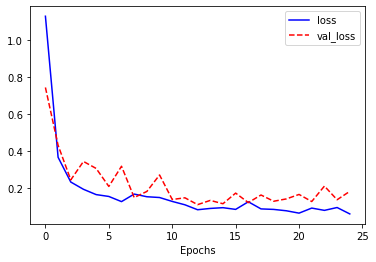

In [10]:
#4.15 회귀 모델의 학습결과(loss, val_loss)를 시각화하기 
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel("Epochs")
plt.legend()
plt.show()

In [11]:
#그래프분석:
#1.loss: 비교적 꾸준히 감소
#2.val_loss: 전체적으로 감소하는 경향을 보이나 항상 감소하지 않음 

In [12]:
#4.16 회귀모델 평가하기
model.evaluate(test_X, test_Y)

102/102 [==============================] - 0s 59us/sample - loss: 0.1987


0.19872587802363376

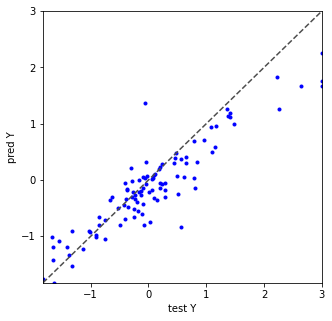

In [16]:
#4.17 실제주택가격과 예측주택가격 시각화하기
#네트워크가 Y값을 얼마나 잘 예측하는지 확인해보기위해
#실제 주택가격(test_Y)과 예측 주택가격(pred_Y)을 1:1로 비교

pred_Y = model.predict(test_X)

plt.figure(figsize = (5, 5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls = "--", c = ".3")
plt.xlabel('test Y')
plt.ylabel('pred Y')
plt.show()

In [ ]:
#그래프분석:
#이상적이라면 모든 점이 검은 점선 위에. 
# --> 검증 데이터와 테스트 데이터에 대해 모두 좋은 예측 성적을 내려면: 
#     검증데이터와 테스트데이터는 가중치에 영향을 미치지 않으므로
#     검증데이터에 대한 성적이 좋아지면 테스트 데이터에 대한 성적도 좋아질 것.
#     검증데이터에 대한 val_loss가 높아지지 않도록 (=과적합되지 않도록) 중간에 학습을 멈춰야.
#학습도중에 끼어들기 위해서: callback함수 사용 --에포크가 끝날때마다 호출됨. 

In [20]:
#4.18 모델 재정의 및 학습
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')

history = model.fit(train_X, 
                    train_Y, 
                    epochs=25, 
                    batch_size=32, 
                    validation_split=0.25, 
                    callbacks=[tf.keras.callbacks.EarlyStopping(
                        patience=3,          #몇번의 에포크를 기준으로 삼을 것인가?!
                        monitor='val_loss'   #어떤 값을 지켜볼 것인가!
                        )]                   # --> 3회의 에포크를 실행하는동안 최고기록을 갱신하지 못한다면 학습 멈춤
                   )

Train on 303 samples, validate on 101 samples
Epoch 1/25
303/303 [==============================] - 0s 2ms/sample - loss: 2.1584 - val_loss: 0.8804
Epoch 2/25
303/303 [==============================] - 0s 76us/sample - loss: 0.5529 - val_loss: 0.5440
Epoch 3/25
303/303 [==============================] - 0s 72us/sample - loss: 0.4190 - val_loss: 0.6784
Epoch 4/25
303/303 [==============================] - 0s 72us/sample - loss: 0.3027 - val_loss: 0.4034
Epoch 5/25
303/303 [==============================] - 0s 79us/sample - loss: 0.2327 - val_loss: 0.3486
Epoch 6/25
303/303 [==============================] - 0s 69us/sample - loss: 0.2063 - val_loss: 0.3181
Epoch 7/25
303/303 [==============================] - 0s 66us/sample - loss: 0.1881 - val_loss: 0.3146
Epoch 8/25
303/303 [==============================] - 0s 63us/sample - loss: 0.1828 - val_loss: 0.3033
Epoch 9/25
303/303 [==============================] - 0s 63us/sample - loss: 0.1831 - val_loss: 0.3453
Epoch 10/25
303/303 [=======

In [ ]:
#history분석: 
#최고기록인 8에포크의 0.3033을 3회의 에포크가 더 실행될동안 갱신하지 못했으므로
#11에포크에서 학습을 멈췄다.

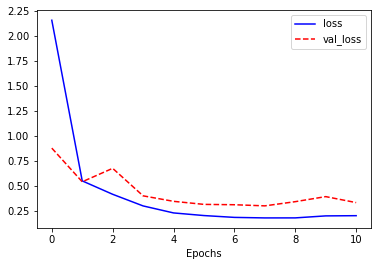

In [21]:
#4.19 회귀모델의 학습결과 시각화
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [ ]:
#그래프분석: 
#4.15그래프보다 val_loss에서 뚜렷한 증가세가 보이지 않음 

In [22]:
#4.20 회귀모델 다시 평가하기
model.evaluate(test_X, test_Y)
#학습의 목적은 loss를 감소시키는 것이기 때문에 이 모델의 학습이 더 잘된 것.

102/102 [==============================] - 0s 68us/sample - loss: 0.2240


0.22398850789257124

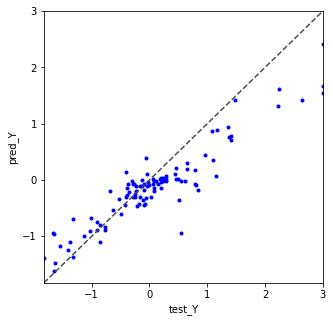

In [23]:
#4.21 시각화하기
pred_Y = model.predict(test_X)

plt.figure(figsize=(5,5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".3")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')
plt.show()

In [ ]:
'''
<SUMMARY> 보스턴 주택가격 데이터셋
※데이터셋 정규화 - 모델생성 - 학습 - 학습결과 시각화 - 학습결과 평가 - 실전 시각화

1. 데이터셋 불러오기
from tensorflow.keras.datasets import boston_housing
(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()


2. 데이터 전처리하기: 정규화
x_mean = train_X.mean(axis = 0)
x_std = train_X.std(axis = 0)

train_X -= x_mean
train_X /= x_std
test_X -= x_mean
test_X /= x_std

y_mean = train_Y.mean(axis = 0)
y_std = train_Y.std(axis = 0)

train_Y -= y_mean
train_Y /= y_std
test_Y -= y_mean
test_Y /= y_std


3. 회귀모델 생성하기
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 52, activation = 'relu', input_shape = (13,)),
    tf.keras.layers.Dense(units = 39, activation = 'relu'),
    tf.keras.layers.Dense(units = 26, activation = 'relu'),
    tf.keras.layers.Dense(units = 1)
    ])

model.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.07), loss = 'mse')


4. 회귀모델 학습시키기
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)


5. 학습결과 시각화하기
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel("Epochs")
plt.legend()
plt.show()


6. 학습결과 평가 및 실제-예측(학습) 시각화하기
model.evaluate(test_X, test_Y)

pred_Y = model.predict(test_X)

plt.figure(figsize = (5, 5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls = "--", c = ".3")
plt.xlabel('test Y')
plt.ylabel('pred Y')
plt.show()


7. 모델 재정의 + 재학습시키기
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units=1)
    ])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')

history = model.fit(train_X, 
                    train_Y, 
                    epochs=25, 
                    batch_size=32, 
                    validation_split=0.25, 
                    callbacks=[tf.keras.callbacks.EarlyStopping(
                        patience=3,          
                        monitor='val_loss'   
                        )]                   
                   )


8. 학습결과 시각화하기
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()


9. 재평가 및 실제-예측(학습) 시각화하기
model.evaluate(test_X, test_Y)

pred_Y = model.predict(test_X)

plt.figure(figsize=(5,5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".3")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')
plt.show()
'''